# Machine Learning Project

Poker Hands

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1 - Lendo os dados de treino

In [15]:
%matplotlib inline
columns_names = ["C1","S1","C2","S2","C3","S3","C4","S4","C5","S5","Y"]
df = pd.read_csv("poker/poker-hand-training-true.csv", header=None, names=columns_names)

## 2 - Criando um preditor baseado na distribuição de $Y$

In [36]:
n_exemples = df.shape[0]
distribution = df.groupby(by="Y").size().apply(lambda x: x/n_exemples)
Y = list(distribution.index)
pY = distribution.values

def random_predict():
    return np.random.choice(Y,p=pY)

Comparando a distribuição do `random_predict()` e de `Y`

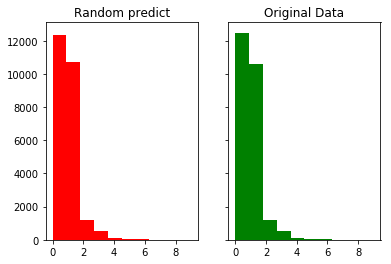

In [68]:
a =[]
for i in range(n_exemples):
    predict = random_predict()
    a.append(predict)
  
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True,sharex=True)
ax1.hist(a, color="r")
ax2.hist(df["Y"], color="g")

plt.title("Histograma de Y")

ax1.set_title("Random predict")
ax2.set_title("Original Data")
plt.show()

## 3 - Aplicando o `random_predict()` ao dado de teste

In [71]:
df_test = pd.read_csv("poker/poker-hand-testing.csv", header=None, names=columns_names)
df_test["Y_p"] = df_test.apply(lambda x: random_predict(),axis=1)

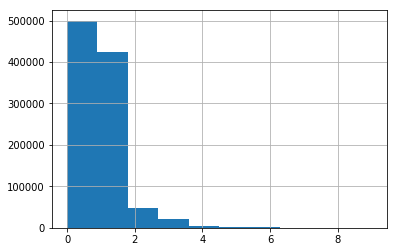

In [72]:
df_test["Y_p"].hist()

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(df_test["Y"],df_test["Y_p"])

print("""
Baseline: {}% de acerto
""".format(acc*100))


Baseline: 43.2461% de acerto

